In [8]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

In [9]:
class Mygraphstate(TypedDict):
    count:int
    msg:str

In [10]:
def counter(state: Mygraphstate) -> Mygraphstate:
    state['count']+=1
    state['msg']=f"Count is {state['count']}"
    return state

In [11]:
workflow = StateGraph(Mygraphstate)

workflow.add_node("Node1", counter)
workflow.add_node("Node2", counter)
workflow.add_node("Node3", counter)

workflow.add_edge(START, "Node1")
workflow.add_edge("Node1","Node2")
workflow.add_edge("Node2","Node3")
workflow.add_edge("Node3",END)



In [12]:
app = workflow.compile()

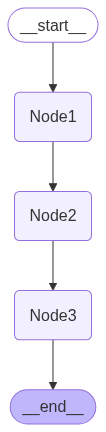

In [13]:
app

In [15]:
app.invoke({'count':0,'msg':'hello'})

{'count': 3, 'msg': 'Count is 3'}

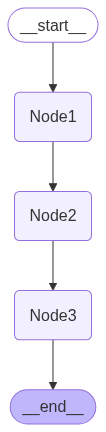

In [16]:
from IPython.display import Image, display
png = app.get_graph().draw_mermaid_png()
display(Image(png))